In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns 


In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import RobustScaler

In [6]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 3.7 MB/s 
     |████████████████████████████████| 199 kB 55.7 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [14]:
from sklearn import metrics

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

In [16]:
dataset = pd.read_csv('diabetes.csv')
df = dataset.copy()
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.shape

(768, 9)

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  768
Columns  :  9

Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing values :   0

Unique values :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

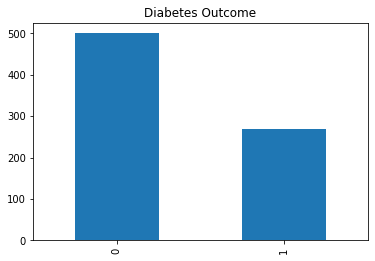

In [20]:
print(df.Outcome.value_counts())
df['Outcome'].value_counts().plot(kind='bar').set_title('Diabetes Outcome')

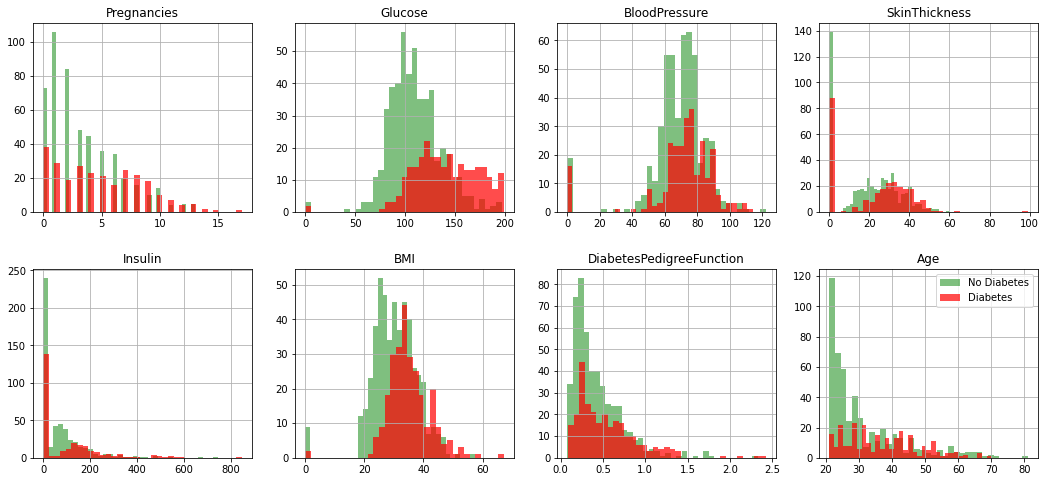

In [21]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    df[df.Outcome==0][feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='red', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

In [22]:
x, y = df.drop('Outcome', axis=1), df['Outcome']
print(x.shape, y.shape)

(768, 8) (768,)


Use LassoCV to find the optimal ALPHA value for L1 regularization
x_scaled (768, 8)
LASSO best alpha:  0.0032550885998350564
[('Glucose', 0.18523526197705018), ('BMI', 0.10062051874924183), ('Pregnancies', 0.06720687760993223), ('DiabetesPedigreeFunction', 0.04563419883905104), ('Age', 0.02857059952528981), ('SkinThickness', 0.0), ('Insulin', -0.01461487718466252), ('BloodPressure', -0.0392670471968321)]


Text(0.5, 1.0, 'Features by LassoCV')

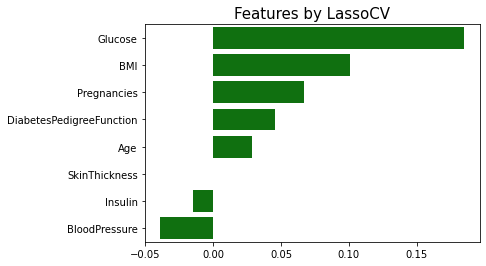

In [23]:
## to find significant features using LassoCV (all X_scaled)
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

print('Use LassoCV to find the optimal ALPHA value for L1 regularization')
# Scale the Predictors on both the train and validation set
std = StandardScaler()
std.fit(x.values)
x_scaled = std.transform(x.values)
print('x_scaled', x_scaled.shape)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(x_scaled, y)
# This is the best alpha value found
print('LASSO best alpha: ', lasso_model.alpha_ )

# display all coefficients in the model with optimal alpha
zipped = list(zip(x.columns, lasso_model.coef_)) 
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
print(zipped)
a,b = zip(*zipped)
sns.barplot(y=list(a), x=list(b), color='g')
plt.title('Features by LassoCV', size=15)

In [24]:
#Univariate Analysis

In [25]:
class_0 = df[df.Outcome ==0] # Outcome = 0 (i.e) Non-Diabetic Patient
class_1 = df[df.Outcome ==1] # Outcome = 1 (i.e) Diabetic Patient

In [26]:
class_0 = class_0.drop('Outcome', axis=1)

Text(1, 2, 'Outcome 0 (Not Diabetic patient) Univariate Plots')

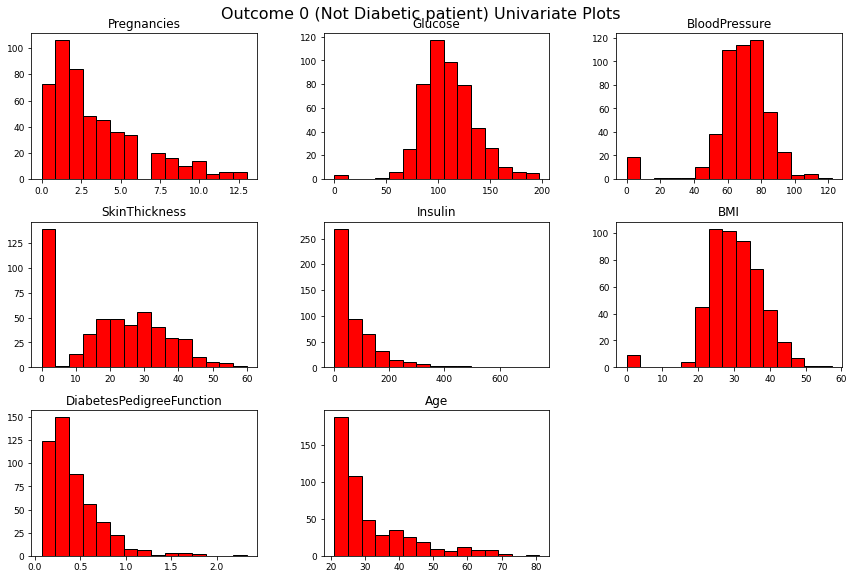

In [27]:
class_0.hist(bins=15, 
             color='red', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=9, 
             ylabelsize=9, 
             grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2)) 
plt.suptitle('Outcome 0 (Not Diabetic patient) Univariate Plots',
             x=1, # title x position
             y=2, # title y position
             fontsize=16)

In [28]:
class_1 = class_1.drop('Outcome',axis=1)

Text(1, 2, 'Outcome 1 (Diabetic patient) Univariate Plots')

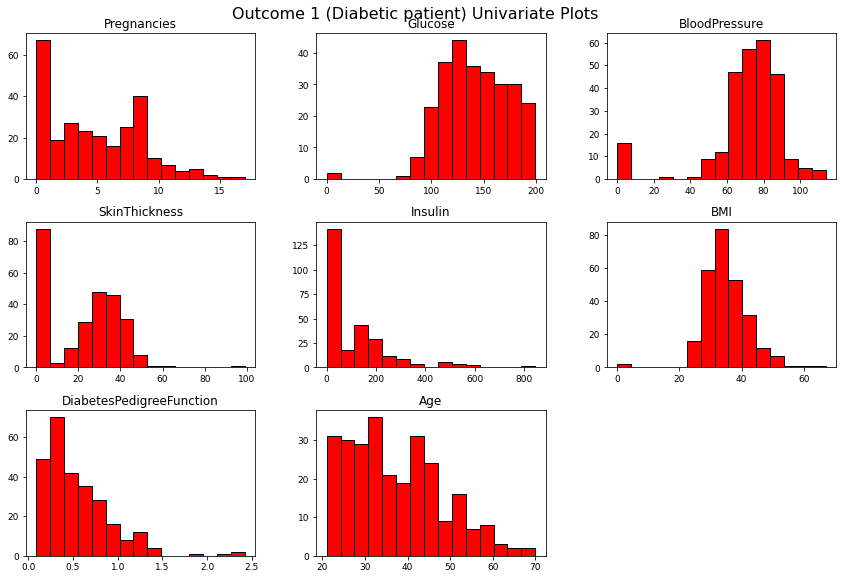

In [29]:
class_1.hist(bins=15, 
             color='red', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=9, 
             ylabelsize=9, 
             grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2)) 
plt.suptitle('Outcome 1 (Diabetic patient) Univariate Plots',
             x=1, # x position of title
             y=2, # y position of title
             fontsize=16)

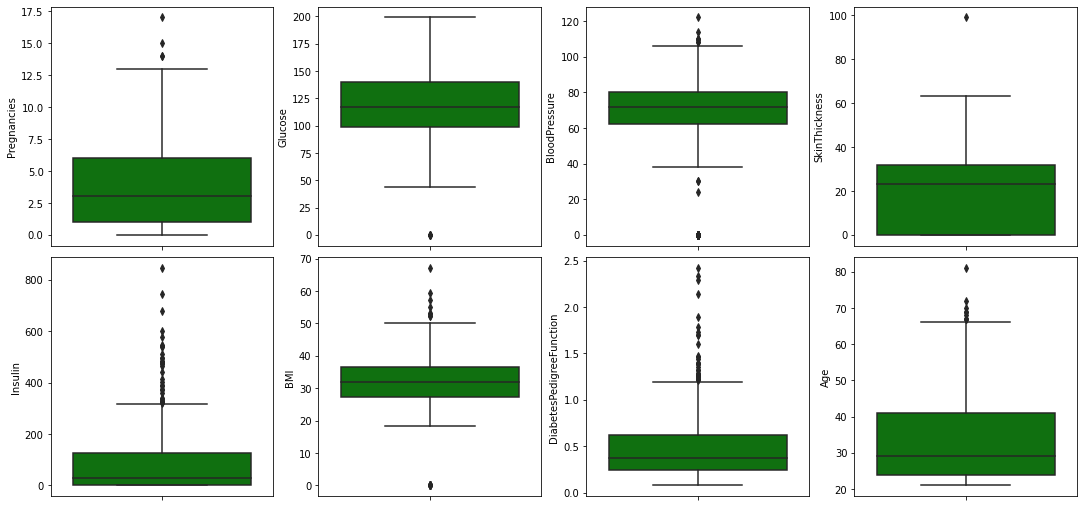

In [30]:
df_box = df.drop('Outcome',axis=1)
fig , ax = plt.subplots(nrows= 2,       #  
                        ncols= 4,        
                        figsize=(15,7) 
                        )
ax = ax.flatten() 
index = 0
for i in df_box.columns:
  sns.boxplot(y=i,data = df_box, ax=ax[index],color='green')
  index += 1
plt.tight_layout(pad=0.5)

In [31]:
#Multivariate Analysis

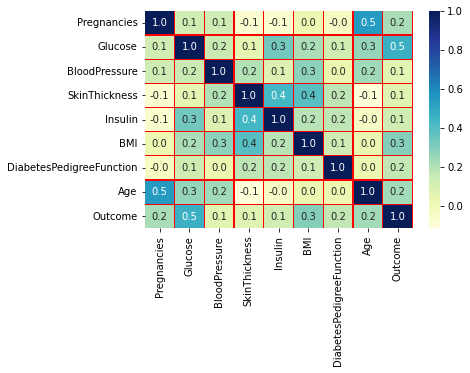

In [32]:
corr = df.corr()
sns.heatmap(corr,
            fmt='.1f',
            linewidth=0.2,
            linecolor='red',
            annot = True,
            cmap="YlGnBu"
            )

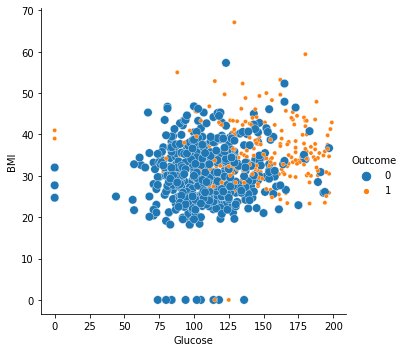

In [33]:
sns.relplot(x='Glucose',
            y='BMI',
            data = df,
            hue = 'Outcome',
            size='Outcome')

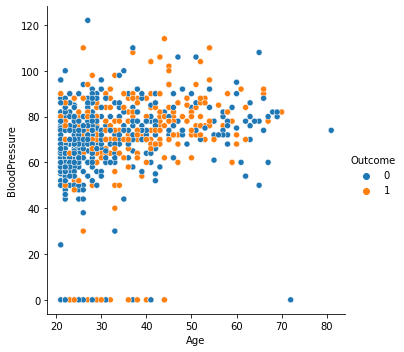

In [34]:
sns.relplot(x='Age',
            y='BloodPressure',
            data = df,
            hue = 'Outcome',)
            #size='Outcome')

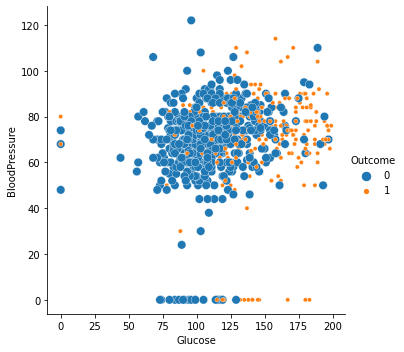

In [35]:
sns.relplot(x='Glucose',
            y='BloodPressure',
            data = df,
            hue = 'Outcome',
            size='Outcome')

In [36]:
#Feature Tranformation

In [37]:
df['Age_bin']=pd.cut(x = df['Age'],                                     
                        bins = [20,30,50,100],                           
                        labels = ['young_aged','middle_aged','old_aged'] 
                    )
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_bin
0,6,148,72,35,0,33.6,0.627,50,1,middle_aged
1,1,85,66,29,0,26.6,0.351,31,0,middle_aged
2,8,183,64,0,0,23.3,0.672,32,1,middle_aged
3,1,89,66,23,94,28.1,0.167,21,0,young_aged
4,0,137,40,35,168,43.1,2.288,33,1,middle_aged


In [38]:
Age_bin = df.Age_bin
df.insert(0,'Aged_bin',Age_bin)
df = df.drop('Age_bin',axis=1)
df.head()

,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,middle_aged,6,148,72,35,0,33.6,0.627,50,1
1,middle_aged,1,85,66,29,0,26.6,0.351,31,0
2,middle_aged,8,183,64,0,0,23.3,0.672,32,1
3,young_aged,1,89,66,23,94,28.1,0.167,21,0
4,middle_aged,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.Aged_bin = df.Aged_bin.replace(to_replace = ['young_aged','middle_aged','old_aged'],value =[0,1,2],inplace=False)
df.head()

,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,1,8,183,64,0,0,23.3,0.672,32,1
3,0,1,89,66,23,94,28.1,0.167,21,0
4,1,0,137,40,35,168,43.1,2.288,33,1


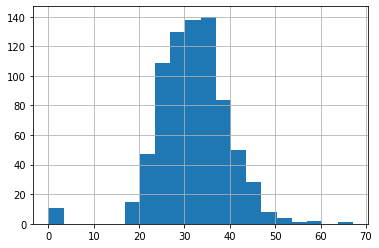

In [40]:
#treating BMI
df.loc[((df.Outcome == 0) &  (df.BMI ==0)) , 'BMI'] = df.loc[((df.Outcome == 0) &  (df.BMI ==0)) , 'BMI'].mean()
df.loc[((df.Outcome == 1) &  (df.BMI ==0)) , 'BMI'] = df.loc[((df.Outcome == 1) &  (df.BMI ==0)) , 'BMI'].mean()
df.BMI.hist(bins=20)

In [42]:
class_0 = (df['Outcome'] == 0) 
class_1 = (df['Outcome'] == 1) 
avg_class_0 = df.loc[class_0, 'BMI'].mean()
avg_class_1 = df.loc[class_1, 'BMI'].mean()
df.loc[df['BMI']==0 & class_0, 'BMI'] = avg_class_0
df.loc[df['BMI']==0 & class_1, 'BMI'] = avg_class_1

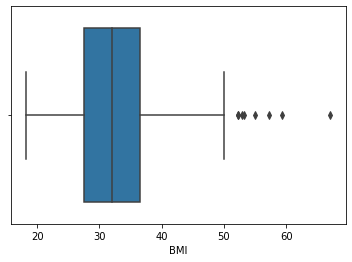

In [43]:
sns.boxplot(x=df.BMI)

In [44]:
df['BMI_bin']=pd.cut(x = df['BMI'],
                        bins = [18,25,30,80], 
                        labels = ['Normal','Overweight','Obese'])
df.head(9)

,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_bin
0,1,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,1,8,183,64,0,0,23.3,0.672,32,1,Normal
3,0,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,1,0,137,40,35,168,43.1,2.288,33,1,Obese
5,0,5,116,74,0,0,25.6,0.201,30,0,Overweight
6,0,3,78,50,32,88,31.0,0.248,26,1,Obese
7,0,10,115,0,0,0,35.3,0.134,29,0,Obese
8,2,2,197,70,45,543,30.5,0.158,53,1,Obese


In [45]:
df.BMI_bin = df.BMI_bin.replace(to_replace = ['Normal','Overweight','Obese'],value =[0,1,2],inplace=False)
BMI_bin = df.BMI_bin
df.insert(0,'BMI_binned',BMI_bin)
df = df.drop(['BMI_bin','BMI'],axis=1)
df.head()

,BMI_binned,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,2,1,6,148,72,35,0,0.627,50,1
1,1,1,1,85,66,29,0,0.351,31,0
2,0,1,8,183,64,0,0,0.672,32,1
3,1,0,1,89,66,23,94,0.167,21,0
4,2,1,0,137,40,35,168,2.288,33,1


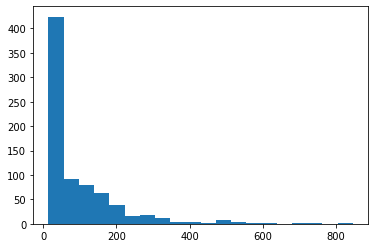

In [46]:
#treating insulin
class_0 = (df['Outcome'] == 0)
class_1 = (df['Outcome'] == 1)
avg_class_0 = df.loc[class_0,'Insulin'].median()
avg_class_1 = df.loc[class_1,'Insulin'].median()
df.loc[df['Insulin']==0 & class_0, 'Insulin'] = avg_class_0
df.loc[df['Insulin']==0 & class_1, 'Insulin'] = avg_class_1
df.Insulin.hist(bins=20,grid=False)

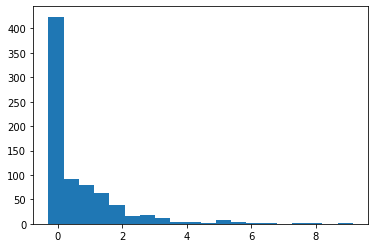

In [47]:
#robust scaler
rs = RobustScaler(with_centering=True, 
                  with_scaling=True, 
                  quantile_range=(25.0, 75.0), 
                  copy=True)
df['Insulin'] = rs.fit_transform(df['Insulin'].values.reshape(-1,1))
df.Insulin.hist(bins=20,grid=False)

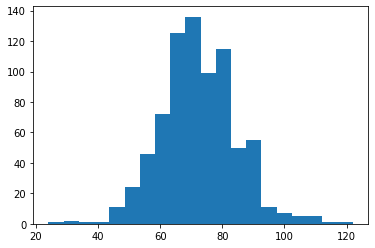

In [48]:
#treating blood pressure
avg_class_0 = df.loc[class_0,'BloodPressure'].median()
avg_class_1 = df.loc[class_1,'BloodPressure'].median()
df.loc[df['BloodPressure']==0 & class_0, 'BloodPressure'] = avg_class_0
df.loc[df['BloodPressure']==0 & class_1, 'BloodPressure'] = avg_class_1

df.BloodPressure.hist(bins=20,grid=False)

In [49]:
from sklearn.preprocessing import StandardScaler

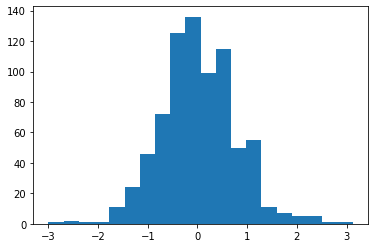

In [50]:
std_scale = StandardScaler(copy=True, 
                           with_mean=True, 
                           with_std=True)
df['BloodPressure'] = rs.fit_transform(df['BloodPressure'].values.reshape(-1,1))
df.BloodPressure.hist(bins=20,grid=False)

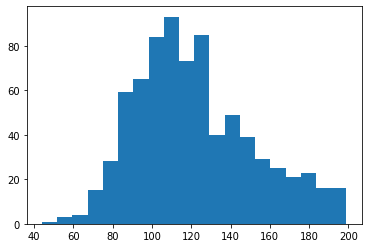

In [51]:
#treating glucose
avg_class_0 = df.loc[class_0,'Glucose'].median()
avg_class_1 = df.loc[class_1,'Glucose'].median()
df.loc[df['Glucose']==0 & class_0, 'Glucose'] = avg_class_0
df.loc[df['Glucose']==0 & class_1, 'Glucose'] = avg_class_1
df.Glucose.hist(bins=20,grid=False)

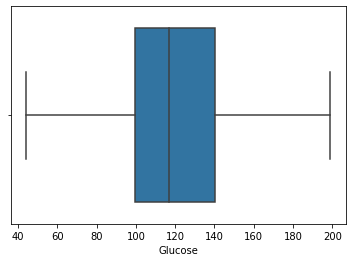

In [52]:
sns.boxplot(x=df.Glucose)

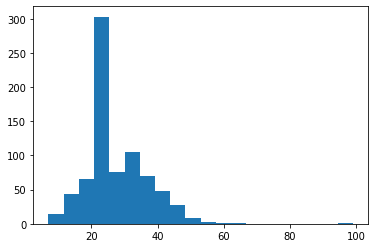

In [53]:
#treating skin thickness
avg_class_0 = df.loc[class_0,'SkinThickness'].median()
avg_class_1 = df.loc[class_1,'SkinThickness'].median()
df.loc[df['SkinThickness']==0 & class_0, 'SkinThickness'] = avg_class_0
df.loc[df['SkinThickness']==0 & class_1, 'SkinThickness'] = avg_class_1
df.SkinThickness.hist(bins=20,grid=False)

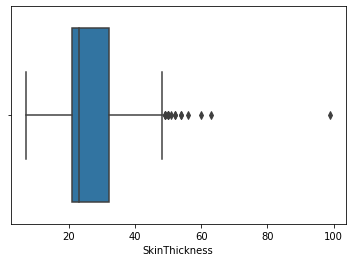

In [54]:
sns.boxplot(x=df.SkinThickness)

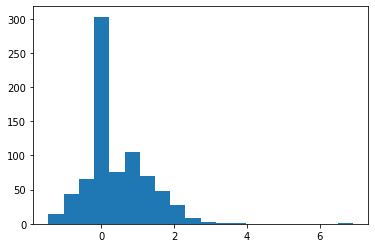

In [55]:
#Since it has more outlier, so it is treated with Robust scaler
df['SkinThickness'] = rs.fit_transform(df['SkinThickness'].values.reshape(-1,1))
df.SkinThickness.hist(bins=20,grid=False)

In [56]:
df.head()

,BMI_binned,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,2,1,6,148,0.000,1.090909,0.000000,0.627,50,1
1,1,1,1,85,-0.375,0.545455,0.000000,0.351,31,0
2,0,1,8,183,-0.500,-0.181818,0.000000,0.672,32,1
3,1,0,1,89,-0.375,0.000000,0.623229,0.167,21,0
4,2,1,0,137,-2.000,1.090909,1.461756,2.288,33,1


In [57]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [58]:
#Here the data is Imbalanced so it is oversampled

In [59]:
#oversampling data
SEED = 42
x = df.drop('Outcome', axis=1)   # axis=0 for row, axis=1 for column
y = df['Outcome']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=SEED, stratify=y)
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (614, 9)
y_train (614,)
x_test (154, 9)
y_test (154,)


In [60]:
#cross validation
#Baseline model performance evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
SEED = 42

In [61]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold

In [62]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [63]:
def baseline_report(model, x_train, x_test, y_train, y_test, name):
    model.fit(x_train, y_train)
    accuracy     = np.mean(cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, x_train, y_train, cv=kf, scoring='precision'))
    f1score      = np.mean(cross_val_score(model, x_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, x_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(x_test)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   
    return df_model


In [64]:
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()

In [65]:
df_models = pd.concat([baseline_report(gnb, x_train, x_test, y_train, y_test, 'GaussianNB'),
                       baseline_report(bnb, x_train, x_test, y_train, y_test, 'BernoulliNB'),
                       baseline_report(knn, x_train, x_test, y_train, y_test, 'KNN'),
                       baseline_report(decisiontree, x_train, x_test, y_train, y_test, 'DecisionTree'),
                       ], axis=0).reset_index()
df_models = df_models.drop('index', axis=1)
df_models

,model,accuracy,precision,f1score,rocauc,timetaken
0,GaussianNB,0.752419,0.652766,0.641294,0.817708,0
1,BernoulliNB,0.667720,0.539136,0.519813,0.703391,0
2,KNN,0.765454,0.697190,0.634128,0.770887,0
3,DecisionTree,0.685606,0.551025,0.556194,0.653073,0


In [66]:
#optimising model

In [92]:
from sklearn.metrics import log_loss

In [106]:
def model_report(model, X_train, X_test, y_train, y_test, model_name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5  
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21),               
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   
        optimal_th = float(th_list[i][score_list.index(max(score_list))])
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))
    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    accuracy      = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy))
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
    precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
    precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
    precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    y_pred = model.predict_proba(X_test)[:,1]  
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(rocauc))
    df_model = pd.DataFrame({'model'        : [model_name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [log_loss],
                             'timetaken'    : [1000]       })   
    return df_model
    

In [107]:
def knights_of_ni():
    from time import sleep
    import random
    import time

In [108]:
import time 
time.time()
time.sleep(2)

In [109]:
from sklearn.metrics import recall_score

In [111]:
print('\n"""""" GaussianNB """"""')
time1 = time.time()
gnb = GaussianNB()
model = model_report(gnb, x_train, x_test, y_train, y_test, 'GaussianNB')
model.timetaken[0] = time.time() - time1


"""""" GaussianNB """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5455,  0.100->0.6277,  0.200->0.6512,  0.300->0.6612,  0.400->0.6207,  0.500->0.6018,  0.600->0.6239,  0.700->0.5962,  0.800->0.5000,  0.900->0.5169,  1.000->0.1034,  
Looping decimal place 2
0.200->0.6512,  0.210->0.6512,  0.220->0.6614,  0.230->0.6667,  0.240->0.6667,  0.250->0.6667,  0.260->0.6667,  0.270->0.6667,  0.280->0.6720,  0.290->0.6557,  0.300->0.6612,  0.310->0.6500,  0.320->0.6387,  0.330->0.6387,  0.340->0.6387,  0.350->0.6325,  0.360->0.6325,  0.370->0.6325,  0.380->0.6207,  0.390->0.6207,  0.400->0.6207,  
Looping decimal place 3
0.270->0.6667,  0.271->0.6667,  0.272->0.6667,  0.273->0.6667,  0.274->0.6667,  0.275->0.6720,  0.276->0.6720,  0.277->0.6720,  0.278->0.6720,  0.279->0.6720,  0.280->0.6720,  0.281->0.6720,  0.282->0.6720,  0.283->0.6720,  0.284->0.6720,  0.285->0.6613,  0.286->0.6613,  0.287->0.6613,  0.288->0.

In [112]:
import time 
time.time()
time.sleep(2)

In [113]:
print('\n"""""" BernoulliNB """"""')
time1 = time.time()
bnb = BernoulliNB()
model = model_report(bnb, x_train, x_test, y_train, y_test, 'BernoulliNB')
model.timetaken[0] = time.time() - time1


"""""" BernoulliNB """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5192,  0.100->0.5684,  0.200->0.6038,  0.300->0.6000,  0.400->0.6429,  0.500->0.5657,  0.600->0.3288,  0.700->0.0000,  0.800->0.0000,  0.900->0.0000,  1.000->0.0000,  
Looping decimal place 2
0.300->0.6000,  0.310->0.6000,  0.320->0.6000,  0.330->0.6000,  0.340->0.6000,  0.350->0.6000,  0.360->0.6000,  0.370->0.6179,  0.380->0.6167,  0.390->0.6491,  0.400->0.6429,  0.410->0.5800,  0.420->0.5800,  0.430->0.5657,  0.440->0.5657,  0.450->0.5657,  0.460->0.5657,  0.470->0.5657,  0.480->0.5657,  0.490->0.5657,  0.500->0.5657,  
Looping decimal place 3
0.380->0.6167,  0.381->0.6167,  0.382->0.6167,  0.383->0.6167,  0.384->0.6167,  0.385->0.6167,  0.386->0.6167,  0.387->0.6167,  0.388->0.6167,  0.389->0.6491,  0.390->0.6491,  0.391->0.6491,  0.392->0.6491,  0.393->0.6491,  0.394->0.6429,  0.395->0.6429,  0.396->0.6429,  0.397->0.6429,  0.398->0

In [114]:
print('\n"""""" KNN """""" ')
time1 = time.time()
print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  
k_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    cvs = cross_val_score(knn, x_train, y_train, cv=kf, scoring='f1').mean()
    k_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))  
optimal_k = k_scores.index(max(k_scores))+1   
print('optimal value of K =', optimal_k)

knn = KNeighborsClassifier(n_neighbors = optimal_k)
model = model_report(knn, x_train, x_test, y_train, y_test, 'KNN')
model.timetaken[0] = time.time() - time1

print('\nCompare with KNN classification_report (same as default threshold 0.50)')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.classification_report(y_test, y_pred))


"""""" KNN """""" 

Search for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold(5) Cross Validation on train data
0.5561, 0.5021, 0.5885, 0.5516, 0.6154, 0.5836, 0.6030, 0.5939, 0.6065, 0.5576, 0.5884, 0.5907, 0.5902, 0.5735, 0.5877, 0.5793, 0.5928, 0.5857, 0.6100, 0.5768, optimal cv F1 score = 0.6154
optimal value of K = 5

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.6415,  0.100->0.6415,  0.200->0.6512,  0.300->0.6512,  0.400->0.5253,  0.500->0.5253,  0.600->0.5253,  0.700->0.4762,  0.800->0.4762,  0.900->0.2154,  1.000->0.2154,  
Looping decimal place 2
0.100->0.6415,  0.110->0.6415,  0.120->0.6415,  0.130->0.6415,  0.140->0.6415,  0.150->0.6415,  0.160->0.6415,  0.170->0.6415,  0.180->0.6415,  0.190->0.6415,  0.200->0.6512,  0.210->0.6512,  0.220->0.6512,  0.230->0.6512,  0.240->0.6512,  0.250->0.6512,  0.260->0.6512,  0.270->0.6512,  0.280->0.6512,  0.290->0.6512,  0.300->0.6512,  
Loo

In [115]:
print('\n"""""" DecisionTreeClassifier """"""')
time1 = time.time()
print('\nSearch for optimal max_depth in DecisionTree, vary 2 to 10, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  
d_scores = []
for d in range(2, 11):
    decisiontree = DecisionTreeClassifier(max_depth=d)
    cvs = cross_val_score(decisiontree, x_train, y_train, cv=kf, scoring='f1').mean()
    d_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal F1 score = {:.4f}'.format(max(d_scores)))  
optimal_d = d_scores.index(max(d_scores))+2   
print('optimal max_depth =', optimal_d)

decisiontree = DecisionTreeClassifier(max_depth=optimal_d)
model = model_report(decisiontree, x_train, x_test, y_train, y_test, 'DecisionTree')
model.timetaken[0] = time.time() - time1


"""""" DecisionTreeClassifier """"""

Search for optimal max_depth in DecisionTree, vary 2 to 10, using KFold(5) Cross Validation on train data
0.4949, 0.5140, 0.5621, 0.6055, 0.5660, 0.5452, 0.5349, 0.5047, 0.5131, optimal F1 score = 0.6055
optimal max_depth = 5

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5258,  0.100->0.6024,  0.200->0.6475,  0.300->0.6182,  0.400->0.6415,  0.500->0.6415,  0.600->0.5714,  0.700->0.3947,  0.800->0.3947,  0.900->0.3947,  1.000->0.0357,  
Looping decimal place 2
0.100->0.6024,  0.110->0.6024,  0.120->0.6024,  0.130->0.6475,  0.140->0.6475,  0.150->0.6475,  0.160->0.6475,  0.170->0.6475,  0.180->0.6475,  0.190->0.6475,  0.200->0.6475,  0.210->0.6475,  0.220->0.6475,  0.230->0.6475,  0.240->0.6475,  0.250->0.6475,  0.260->0.6475,  0.270->0.6475,  0.280->0.6261,  0.290->0.6261,  0.300->0.6182,  
Looping decimal place 3
0.120->0.6024,  0.121->0.6024,  0.122->0.6024,  0.123->0.6

In [116]:
df_models 


,model,accuracy,precision,f1score,rocauc,timetaken
0,GaussianNB,0.752419,0.652766,0.641294,0.817708,0
1,BernoulliNB,0.667720,0.539136,0.519813,0.703391,0
2,KNN,0.765454,0.697190,0.634128,0.770887,0
3,DecisionTree,0.685606,0.551025,0.556194,0.653073,0


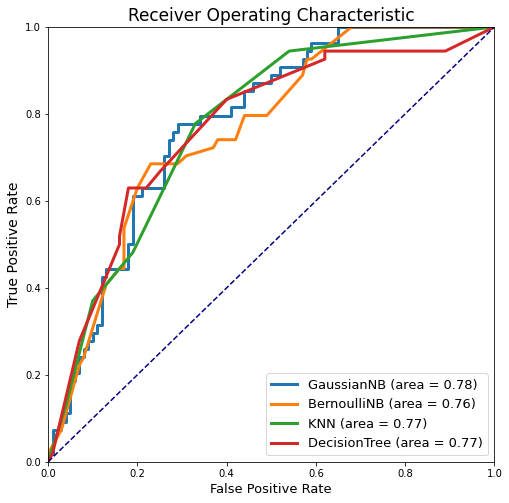

In [117]:
# plot the ROC curves
model_name = [gnb, bnb, knn, decisiontree]
plt.figure(figsize=(8,8))
for i in range(4):
    y_pred = model_name[i].predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, lw=3, label=df_models.model[i] + ' (area = %0.2f)' % auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
model_name = [gnb, bnb, knn, decisiontree]

plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [118]:
print('x_train.shape:', x_train.shape)
print(pd.value_counts(pd.Series(y_train)))
gnb.fit(x_test, y_test)
y_pred = gnb.predict(x_test)
print('Model accuracy is', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

x_train.shape: (614, 9)
0    400
1    214
Name: Outcome, dtype: int64
Model accuracy is 0.7597402597402597
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.65      0.69      0.67        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

[[80 20]
 [17 37]]
